
#Data Preprocessing
1.   For data preprocessing => converting the binary yes,no to 1,0 similarly for gender. Standardising the features: "like","VisitFrequency","Age"
2. After applying kmeans without standardising I observed the clusters were greatly influenced by the age, because the range of that feature was huge as compared to others and thus "Age" dominated the Kmeans clustering algorithm.
 
Therefore standardisation was applied followed by PCA for dimensionality reduction => It resulted in better clustering with reduced overlap and 6 components.
 
#Exploartory data Analysis
1. The graphs were plotted before standardising the variables for better visualisation
2. The give a general overview of data w.r.t to the major features
 
#Model fitting
1. Elbow method and scree plot for PCA gave the optimal clusters to be 4 and principal components to be 6 respectively.
2. After fitting the model, boxplots were plotted to understand the trend in features. Certain major characteristics of each cluster have been highlighted via the box plots.

# Market Segmentation (Clusters 0,1,2,3)
1. Cluster 2 thinks the food is healthy
2. Customers from Cluster 1 are the most frequent visitors
3. Not much correlation between age and like (0.046)
 
#Inferences:
1. Customers from cluster 0 do like the food but don't find it healthy,and are the least frequent visitors.. they belong to the age grp around 40-60 yrs. Some also find it expensive. Efforts: Make food healthy + start some healthy combo meals to motivate them to buy.
2. Customers from cluster 1 have the highest visiting frequency they have given the highest number of likes. Age group is 30-40 (These will be the working population) who are currently able to afford and enjoy the existing services. But again they don't find the food healthy.. thus implementing the healthy combo options here would be a great opportunity to grow by targeting the market segment which is already in the profitable area.
3. Customers from cluster 2 belong to around 55+ of age... These people don't visit often and have given the worst rating for the food. As they are elderly there might be issues to come to McD centres, thus alternate web apps can be explored to make ordering easier for them.
Different food segments depending on the tastes of elderly people can be started to make the foreign food seem more homely.
4. Customers from cluster 3 are the 2nd most frequent visitors spanning the age group around 20-30, they have given -ve ratings and also think the food to be expensive. Introducing some product with an affordable price with a tinge of taste change can help us venture more into this segment.

# References: 
1. https://365datascience.com/tutorials/python-tutorials/pca-k-means/
2. https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/
3. https://www.kaggle.com/code/ecemboluk/market-segmentation-with-clustering/notebook



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
data=pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [4]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
#Check for NaN under an entire DataFrame:
#print(pd.isnull(data).sum()) OR
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
data.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [9]:
df = data.replace({'Yes': 1, "No": 0})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [10]:
print('Visit Frequency')
print(df['VisitFrequency'].value_counts())
print('Gender')
print(df['Gender'].value_counts())
print('Like')
print(df['Like'].value_counts())

Visit Frequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64
Gender
Female    788
Male      665
Name: Gender, dtype: int64
Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


In [11]:
df['VisitFrequency'] = df['VisitFrequency'].astype('category')
df['VisitFrequency'] = df['VisitFrequency'].cat.codes

df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

df['Like'] = df['Like'].astype('category')
df['Like'] = df['Like'].cat.codes

In [12]:
#df['Age'] = (df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())
df['Age'] = (df['Age']-df['Age'].mean())/(df['Age'].std())

In [13]:
df['Like'] = (df['Like']-df['Like'].mean())/(df['Like'].std())

In [14]:
df['VisitFrequency'] = (df['VisitFrequency']-df['VisitFrequency'].mean())/(df['VisitFrequency'].std())

In [15]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0.395623,1.152861,-1.502224,0
1,1,1,0,1,1,1,1,1,1,0,0,-1.055261,0.449685,-1.502224,0
2,0,1,1,1,1,1,0,1,1,1,0,-1.345438,1.223179,-1.502224,0
3,1,1,0,1,1,1,1,1,0,0,1,-0.474907,1.715403,0.775607,0
4,0,1,0,1,1,1,1,0,0,1,0,-1.055261,0.309049,0.206149,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,1.266153,0.168414,1.345065,1
1449,1,1,0,1,0,0,1,1,0,1,0,-1.055261,-0.605080,0.775607,0
1450,1,1,0,1,0,1,0,1,1,0,0,-0.765084,0.520002,0.206149,0
1451,1,1,0,0,0,1,1,1,0,1,0,-0.474907,-0.253492,-1.502224,1


In [16]:
print('Visit Frequency')
print(df['VisitFrequency'].value_counts())
print('Gender')
print(df['Gender'].value_counts())
print('Like')
print(df['Like'].value_counts())

Visit Frequency
 0.206149    439
-1.502224    342
 1.345065    252
 0.775607    235
-0.363309    131
-0.932766     54
Name: VisitFrequency, dtype: int64
Gender
0    788
1    665
Name: Gender, dtype: int64
Like
-0.765084    229
-1.055261    187
 0.975977    169
-0.474907    160
-1.345438    152
 1.266153    152
 1.556330    143
 0.395623     73
 0.685800     71
 0.105446     59
-0.184731     58
Name: Like, dtype: int64


In [17]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1.453000e+03,1.453000e+03,1.453000e+03,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,-1.319202e-16,8.680064e-17,7.029630e-18,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,1.000000e+00,1.000000e+00,1.000000e+00,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.345438e+00,-1.870798e+00,-1.502224e+00,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.650841e-01,-8.160333e-01,-9.327663e-01,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-4.749073e-01,2.777862e-02,2.061492e-01,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,9.759765e-01,8.715906e-01,7.756069e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.556330e+00,1.856038e+00,1.345065e+00,1.000000


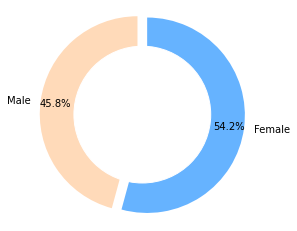

In [18]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(4,4)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


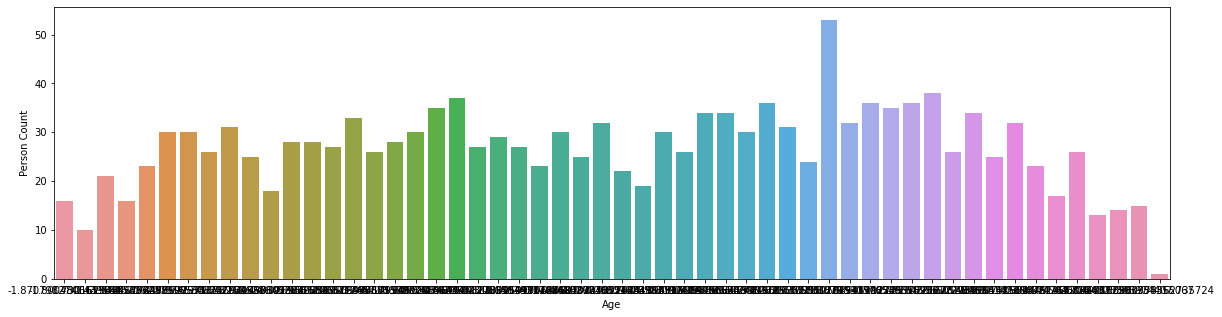

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(df.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

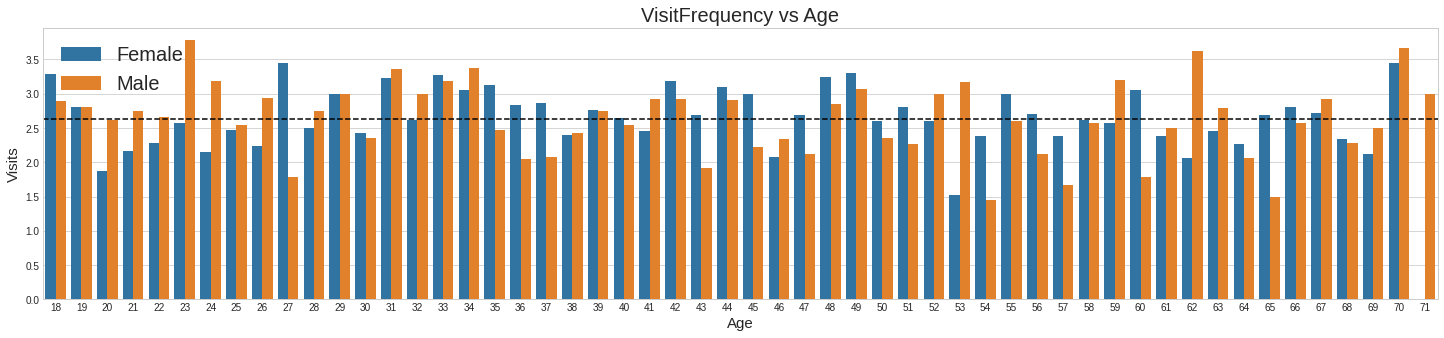

In [37]:
plt.figure(figsize=(25,5))
plt.style.use("seaborn-whitegrid")
plt.title('VisitFrequency vs Age', fontsize=20)

ageplot = sns.barplot(
    x="Age", y="VisitFrequency", 
    hue="Gender",data=df,
    ci=None)

plt.legend(["Female", "Male"], fontsize=20)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Visits", fontsize = 15)
plt.axhline(df["VisitFrequency"].mean(), linestyle='--', color='k')
plt.show()

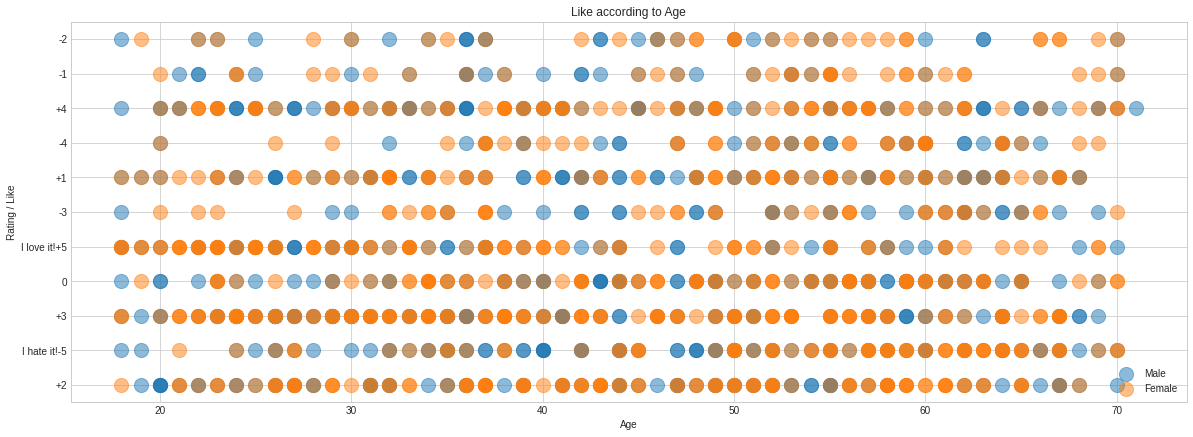

In [40]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Like', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Rating / Like")
plt.title("Like according to Age")
plt.show()

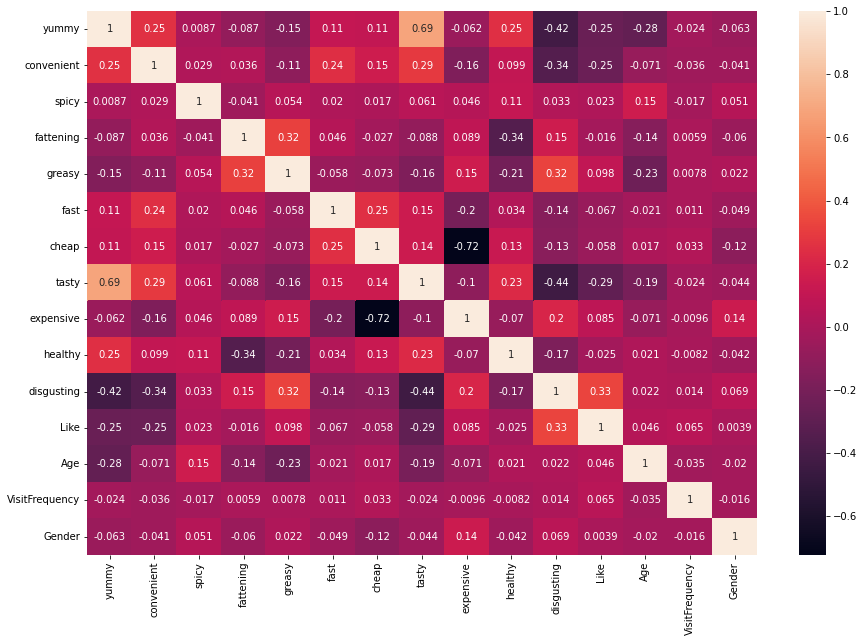

In [20]:
plt. figure(figsize=(15,10))

cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()
pca.fit(df)
pca.explained_variance_ratio_
# pca = PCA(n_components=3)

array([0.22746067, 0.20542996, 0.18112205, 0.0947679 , 0.06849382,
       0.04665667, 0.04021197, 0.02954934, 0.0215887 , 0.0185444 ,
       0.01533664, 0.01453258, 0.01359573, 0.01192442, 0.01078516])

Text(0, 0.5, 'Cumulative explained variance')

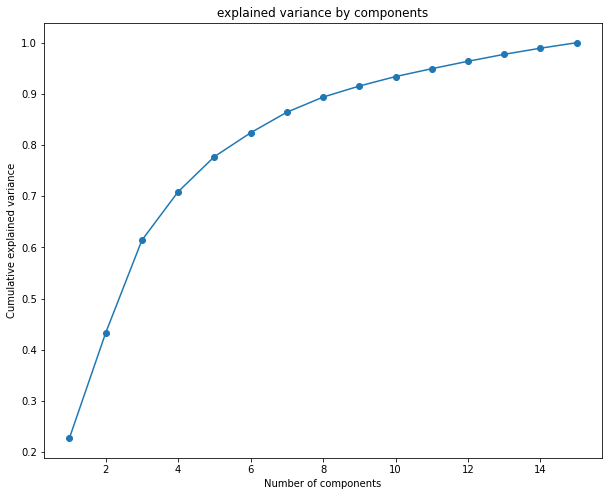

In [23]:
plt.figure(figsize=(10,8))
plt.plot(range(1,16),pca.explained_variance_ratio_.cumsum(),marker="o")
plt.title("explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [24]:
pca = PCA(0.80)
pc = pca.fit_transform(df) # << to retain the components in an object
pc

#pca.explained_variance_ratio_
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  6 ;
Total explained variance =  0.82393


In [25]:
pca = PCA(n_components=6)
pca.fit(df)
scores_pca = pca.transform(df)

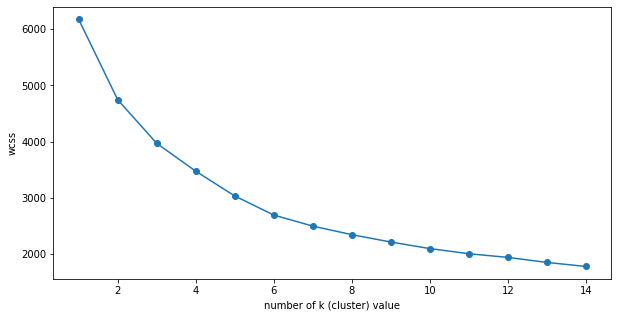

In [26]:
#define k value
wcss = []
for k in range(1,15):
    kmeans_pca = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

# the best value is elbow value. It's 4.
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss,marker="o")
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [27]:
kmeans_pca = KMeans(4, init = 'k-means++', random_state=42).fit(df)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [28]:
df = pd.concat([df,pd.DataFrame(scores_pca)], axis=1)
df.columns.values[-6:] = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6']
df['cluster_number'] = kmeans_pca.labels_

In [29]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Age,VisitFrequency,Gender,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,cluster_number
0,0,1,0,1,0,1,1,0,1,0,...,1.152861,-1.502224,0,0.735870,-1.782033,0.661703,0.031800,-0.126914,-0.358570,0
1,1,1,0,1,1,1,1,1,1,0,...,0.449685,-1.502224,0,-1.145818,-1.443730,0.421974,0.174922,0.003541,-0.676597,2
2,0,1,1,1,1,1,0,1,1,1,...,1.223179,-1.502224,0,-0.725484,-2.145920,-0.033674,0.824817,0.397824,-0.725587,2
3,1,1,0,1,1,1,1,1,0,0,...,1.715403,0.775607,0,0.521764,-0.678285,-1.545833,-0.117856,-0.432936,-0.593521,2
4,0,1,0,1,1,1,1,0,0,1,...,0.309049,0.206149,1,-0.432010,-0.367558,-0.763057,0.435809,-0.798407,0.656914,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,0.168414,1.345065,1,1.838265,1.175527,-0.137872,1.125258,0.253838,0.265088,1
1449,1,1,0,1,0,0,1,1,0,1,...,-0.605080,0.775607,0,-1.200041,0.599715,-0.938634,-0.554029,0.030240,-0.229399,3
1450,1,1,0,1,0,1,0,1,1,0,...,0.520002,0.206149,0,-0.483049,-0.403101,-0.764072,0.299001,0.906920,-0.672831,2
1451,1,1,0,0,0,1,1,1,0,1,...,-0.253492,-1.502224,1,-1.112987,-1.040803,0.750642,-0.922670,0.332830,0.833530,2


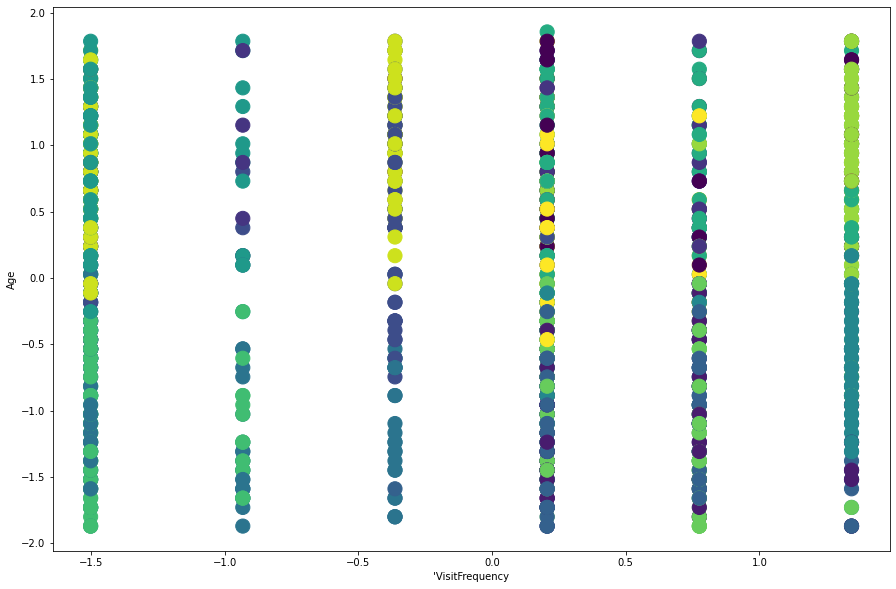

In [30]:
kmeans_pca = KMeans(n_clusters=k, init="k-means++", random_state=42)
data_predict = kmeans_pca.fit_predict(df)

plt.figure(figsize=(15,10))
#plt.scatter( x = 'Like' ,y = 'cluster_number' , data = df , c = data_predict , s = 200, color=['red','green','blue','black'] )
plt.scatter( x = 'VisitFrequency' ,y = 'Age' , data = df , s = 200, c=data_predict)
plt.xlabel("'VisitFrequency")
plt.ylabel("Age")
plt.show()

In [35]:
df["Segment"] = df["cluster_number"].map({0:'first',
                                          1:'second',
                                          2:'third',
                                          3:'fourth',
                                          4:'fifth',
                                          6:'sixth'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


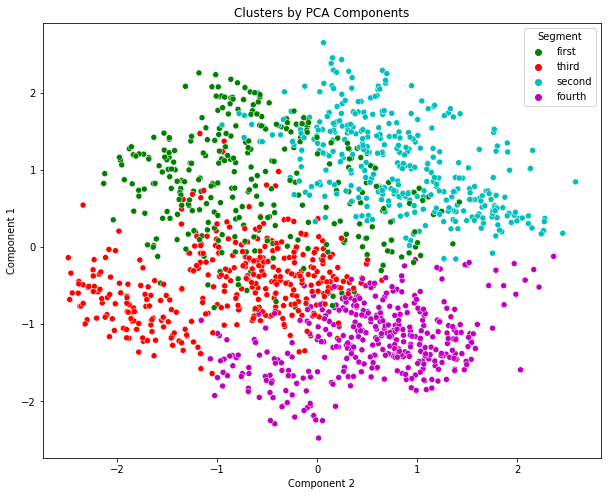

In [36]:
x_axis = df["Component 2"]
y_axis = df["Component 1"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df["Segment"], palette=['g','r','c','m'])
plt.title("Clusters by PCA Components")
plt.show()

In [48]:
cross_gender = pd.crosstab(df['cluster_number'], df['Gender'])
cross_gender

Gender,0,1
cluster_number,,
0,152,164
1,213,155
2,216,160
3,207,186


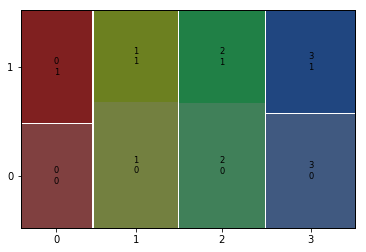

In [49]:
mosaic(cross_gender.stack())
plt.show()

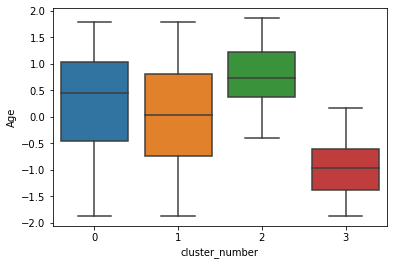

In [50]:
sns.boxplot(x='cluster_number', y='Age', data=df)

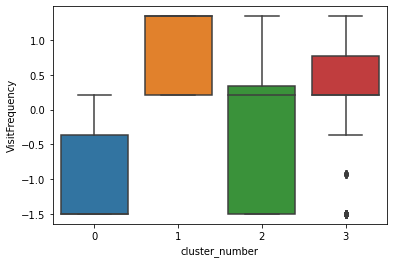

In [51]:
sns.boxplot(x='cluster_number', y='VisitFrequency', data=df)

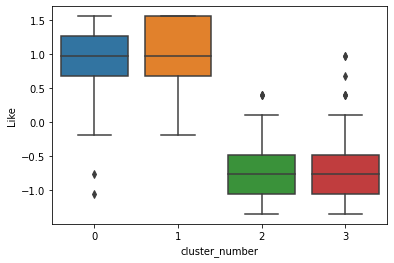

In [52]:
sns.boxplot(x='cluster_number', y='Like', data=df)

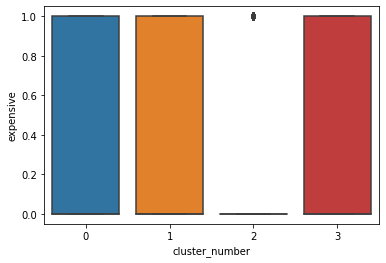

In [53]:
sns.boxplot(x='cluster_number', y='expensive', data=df)

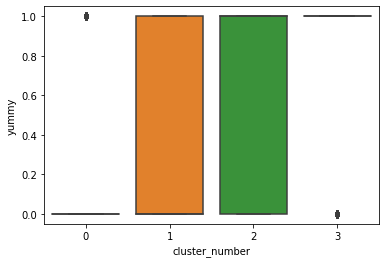

In [56]:
sns.boxplot(x='cluster_number', y='yummy', data=df)

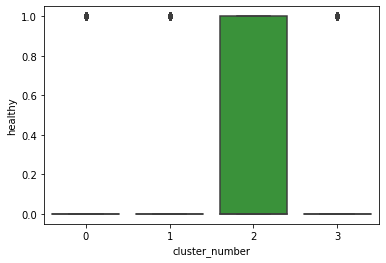

In [57]:
sns.boxplot(x='cluster_number', y='healthy', data=df)

In [54]:
from sklearn.preprocessing import LabelEncoder

df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_number')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_number,VisitFrequency
0,0,0.895570
1,1,4.247283
2,2,2.422872
3,3,2.737913
